## Instalação e importação das bibliotecas

In [ ]:
!pip install yfinance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-02-19 18:15:34--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-19 18:15:35--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-19 18:15:35--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import yfinance as yf
import talib as ta

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Carregamento da base de dados

In [ ]:
df = yf.download('CRFB3.SA', start='2015-01-01')

df.dropna(inplace=True)
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-20,14.95,15.04,14.36,14.90,13.196372,34318500
2017-07-21,15.05,15.08,14.87,15.00,13.284938,4515000
2017-07-24,15.05,15.20,15.00,15.15,13.417789,4833300
2017-07-25,15.11,15.40,15.01,15.40,13.639202,5926300
2017-07-26,15.45,15.46,15.10,15.10,13.373507,9220500
...,...,...,...,...,...,...
2024-02-09,11.64,11.89,11.40,11.77,11.770000,8646400
2024-02-14,11.60,11.65,11.43,11.54,11.540000,5217000
2024-02-15,11.56,11.71,11.25,11.25,11.250000,5005000


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
clean_dataset(df)

<ipython-input-186-19e362bcb334>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-20,14.95,15.04,14.36,14.90,13.196372,34318500.0
2017-07-21,15.05,15.08,14.87,15.00,13.284938,4515000.0
2017-07-24,15.05,15.20,15.00,15.15,13.417789,4833300.0
2017-07-25,15.11,15.40,15.01,15.40,13.639202,5926300.0
2017-07-26,15.45,15.46,15.10,15.10,13.373507,9220500.0
...,...,...,...,...,...,...
2024-02-09,11.64,11.89,11.40,11.77,11.770000,8646400.0
2024-02-14,11.60,11.65,11.43,11.54,11.540000,5217000.0
2024-02-15,11.56,11.71,11.25,11.25,11.250000,5005000.0


In [ ]:
df['EMA10'] = ta.EMA(df['Close'].values, timeperiod=10)
df['EMA30'] = ta.EMA(df['Close'].values, timeperiod=30)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14)
df['RSI'] = ta.RSI(df['Close'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,
2024-02-09,11.64,11.89,11.40,11.77,11.77,8646400,11.353530,11.355876,0.476269,20.779773,56.573032,-0.022451,-0.133245
2024-02-14,11.60,11.65,11.43,11.54,11.54,5217000,11.387433,11.367755,0.466536,20.365912,52.746866,-0.003947,-0.107386
2024-02-15,11.56,11.71,11.25,11.25,11.25,5005000,11.362446,11.360158,0.466069,19.367562,48.310291,-0.012539,-0.088416
2024-02-16,11.40,11.40,11.05,11.13,11.13,6031400,11.320183,11.345309,0.457778,18.151810,46.564959,-0.028700,-0.076473
2024-02-19,10.99,11.08,10.76,10.81,10.81,5778400,11.227422,11.310773,0.451508,17.815642,42.187924,-0.066561,-0.074491


In [ ]:
df['ClgtEMA10'] = np.where(df['Close'] > df['EMA10'], 1, -1)
df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,,,,,,,,,,,
2024-02-09,11.64,11.89,11.40,11.77,11.77,8646400,11.353530,11.355876,0.476269,20.779773,56.573032,-0.022451,-0.133245,1,-1,-1
2024-02-14,11.60,11.65,11.43,11.54,11.54,5217000,11.387433,11.367755,0.466536,20.365912,52.746866,-0.003947,-0.107386,1,1,-1
2024-02-15,11.56,11.71,11.25,11.25,11.25,5005000,11.362446,11.360158,0.466069,19.367562,48.310291,-0.012539,-0.088416,-1,1,-1
2024-02-16,11.40,11.40,11.05,11.13,11.13,6031400,11.320183,11.345309,0.457778,18.151810,46.564959,-0.028700,-0.076473,-1,-1,-1
2024-02-19,10.99,11.08,10.76,10.81,10.81,5778400,11.227422,11.310773,0.451508,17.815642,42.187924,-0.066561,-0.074491,-1,-1,-1


In [ ]:
df['Return'] = df['Close'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df.Return > 0, 1, 0)
df['target_rgs'] = df['Return']
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_cls,target_rgs
Date,,,,,,,,,,,,,,,,,,,
2017-07-20,14.95,15.04,14.36,14.90,13.196372,34318500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.006711,1,0.006711
2017-07-21,15.05,15.08,14.87,15.00,13.284938,4515000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.010000,1,0.010000
2017-07-24,15.05,15.20,15.00,15.15,13.417789,4833300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.016502,1,0.016502
2017-07-25,15.11,15.40,15.01,15.40,13.639202,5926300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-0.019480,0,-0.019480
2017-07-26,15.45,15.46,15.10,15.10,13.373507,9220500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.002649,1,0.002649


In [ ]:
predictors_list = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
clean_dataset(df)
X = df[predictors_list]
X.tail()

<ipython-input-186-19e362bcb334>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
Date,,,,,,
2024-02-08,0.475213,21.225469,55.262875,1,-1,-1
2024-02-09,0.476269,20.779773,56.573032,1,-1,-1
2024-02-14,0.466536,20.365912,52.746866,1,1,-1
2024-02-15,0.466069,19.367562,48.310291,-1,1,-1
2024-02-16,0.457778,18.151810,46.564959,-1,-1,-1


In [ ]:
y_cls = df.target_cls
y_cls.tail()


Date
2024-02-08    1
2024-02-09    0
2024-02-14    0
2024-02-15    0
2024-02-16    0
Name: target_cls, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(1122, 6) (1122,)
(481, 6) (481,)


In [ ]:
def get_drawdown(data):
  data['HighValue'] = data['total_profit'].cummax()
  data['Drawdown'] = data['total_profit']-data['HighValue']
  return data['Drawdown'].min(),data['Drawdown'].mean()

In [ ]:
## ETAPA DE TREINAMENTO

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.model_selection import  GridSearchCV

print('Decision Tree')
'''
param_grid_DecisionTreeClassifier = {
    'max_depth': [2,4,6,8,10],
    'max_features': [2, 3,4,5],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [6,8, 10, 12]
}
'''
#param_grid_SVC = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
#param_grid_LogisticRegression = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
param_grid_KNeighborsClassifier = {'n_neighbors': [1, 5, 10] }

#search = GridSearchCV(DecisionTreeClassifier(), param_grid_DecisionTreeClassifier)
#search = GridSearchCV(SVC(), param_grid_SVC)
#search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_LogisticRegression)
search = GridSearchCV(KNeighborsClassifier(), param_grid_KNeighborsClassifier)

search.fit(X_cls_train,y_cls_train)
clf = search.best_estimator_
pred= clf.predict(X_cls_test)
dt_acc = accuracy_score(y_cls_test, pred)


f1=f1_score(y_cls_test,pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1))

print(pred)

#if(prev[0] == 0):
#  print('Compra')
#else:
#  print('Venda')

Decision Tree
Acurácia Decision Tree:0.5114345114345115
F1 Score:0.5114345114345115
[1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1
 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 1 0 0 0

## ETAPA DE CLASSIFICAÇÃO

Min =  -47.478287825951355
Mean =  -23.60872389001669
Taxa de Acerto: 46.666666666666664 %
Taxa de Erro: 53.333333333333336 %
Ganho: 115.84272351552434 %
Perda: 136.91324552394312 %
payoff: 0.8461031149485533
Lucro Total: -21.070522008418784 %
Lucro Total em Reais: -5.570000648498535
Buy and Hold: -43.44512224670159 %
Total de Operacoes: 90


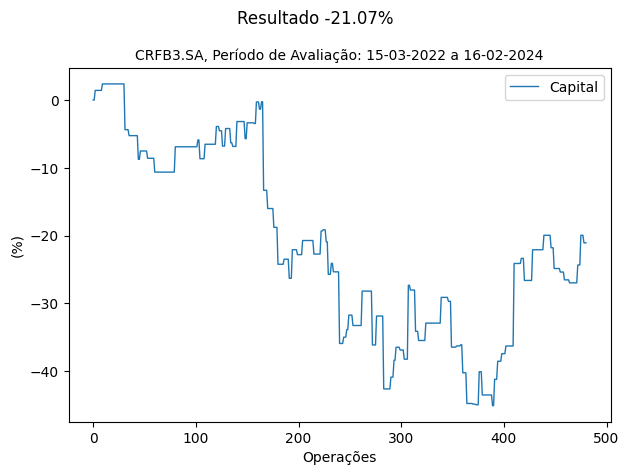

In [ ]:
quant_operacoes=0
operacoes_lucro=0
operacoes_prejuizo=0
total_profit_RS=0
total_profit = 0
ganho=0
perda=0
gt = {'total_profit': []}
pos = 0
comprado = False
for i in range(X_cls_train.shape[0],df.shape[0],1):
  if comprado == False and pred[pos] == 1: ## sinal de compra
    comprado = True
    buy_price = df['Close'][i]
  elif comprado == True and pred[pos] !=1: ##sinal de venda
    comprado = False
    quant_operacoes+=1
    total_profit_RS += df['Close'][i] - buy_price # Soma em R$ TOTAL
    if (df['Close'][i] - buy_price > 0):
      operacoes_lucro+=1
      ganho+=((df['Close'][i]-buy_price)/buy_price)*100
      total_profit +=((df['Close'][i]-buy_price)/buy_price)*100
    else:
      operacoes_prejuizo+=1
      perda+=((df['Close'][i]-buy_price)/buy_price)*100
      total_profit +=((df['Close'][i]-buy_price)/buy_price)*100
  gt['total_profit'].append(total_profit)
  pos=pos+1

taxa_acerto=(operacoes_lucro/quant_operacoes)*100
taxa_erro=(operacoes_prejuizo/quant_operacoes)*100

# Obtendo a primeira e última data do conjunto de teste
primeira_data_teste = df.index[len(X_cls_train)].strftime("%d-%m-%Y")
ultima_data_teste = df.index[-1].strftime("%d-%m-%Y")


plt.figure()
plt.plot(gt['total_profit'],linewidth=1)
plt.xlabel('Operações')
plt.ylabel('(%)')
plt.suptitle(f"Resultado {total_profit:.2f}%")
titulo = f"CRFB3.SA, Período de Avaliação: {primeira_data_teste} a {ultima_data_teste}"
plt.title(titulo, fontsize=10)#dia-mes-ano
plt.legend(['Capital'])
plt.tight_layout()
plot_filename = 'resultado_plot.png'
plt.savefig(plot_filename)
#files.download(plot_filename)
aux = pd.DataFrame(gt)
minD,meanD = get_drawdown(aux)
print("Min = ",minD)
print("Mean = ",meanD)

# Obtendo as datas do primeiro e último dia do conjunto de teste
primeira_data_teste = df.index[len(X_cls_train)]
ultima_data_teste = df.index[-1]

first_price = df.loc[primeira_data_teste]['Close']
last_price = df.loc[ultima_data_teste]['Close']
buy_and_hold =  ((last_price-first_price)/first_price)*100

print(f"Taxa de Acerto: {taxa_acerto} %")#Representa em porcetagem somente as operações que deram lucro
print(f"Taxa de Erro: {taxa_erro} %")#Representa em porcetagem somente as operações que deram prejuizo
print(f"Ganho: {ganho} %")#Representa em porcetagem somente o valor as operações que deram lucro %R$
print(f"Perda: {abs(perda)} %")#Representa em porcetagem somente o valor as operações que deram prejuizo %R$
print(f"payoff: {ganho/abs(perda)}")
print(f"Lucro Total: {total_profit} %")
print(f"Lucro Total em Reais: {total_profit_RS}")
print(f"Buy and Hold: {buy_and_hold} %")
print(f"Total de Operacoes: {quant_operacoes}")